In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
dfm = pd.read_csv(r'C:\Users\user\Documents\machine-learning\week 2\latihan week 2\Week2_Retail Store.csv')

In [37]:
dfm.sample(5)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
2078,TXN_7281592,CUST_02,Milk Products,Item_1_MILK,5.0,6.0,30.0,Cash,In-store,2023-05-30,False
5287,TXN_5065235,CUST_11,Patisserie,Item_11_PAT,20.0,5.0,100.0,Cash,Online,2022-11-03,NaN
6083,TXN_3490100,CUST_20,Milk Products,Item_1_MILK,5.0,5.0,25.0,Credit Card,Online,2022-07-20,NaN
10892,TXN_6212454,CUST_17,Computers and electric accessories,Item_13_CEA,23.0,5.0,115.0,Cash,In-store,2024-04-14,True
9780,TXN_4525407,CUST_19,Milk Products,Item_24_MILK,39.5,8.0,316.0,Cash,In-store,2022-03-02,True


In [38]:
dfm['Transaction Date'] = pd.to_datetime(dfm['Transaction Date'])
dfm.dtypes # mengganti tipe data pada colom Transaction Date become datetime

Transaction ID              object
Customer ID                 object
Category                    object
Item                        object
Price Per Unit             float64
Quantity                   float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
Discount Applied            object
dtype: object

# Exploratory Data Analysis (EDA)

## Deskripsi statistik (mean, median, standard deviation, dll.)

In [39]:
dfm.describe()

,Price Per Unit,Quantity,Total Spent,Transaction Date
count,11966.000000,11971.000000,11971.000000,12575
mean,23.365912,5.536380,129.652577,2023-07-12 20:23:41.105368064
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00
25%,14.000000,3.000000,51.000000,2022-09-30 00:00:00
50%,23.000000,6.000000,108.500000,2023-07-13 00:00:00
75%,33.500000,8.000000,192.000000,2024-04-24 00:00:00
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00
std,10.743519,2.857883,94.750697,NaN


## Identifikasi dan penanganan missing value

In [40]:
# code ini berfungsi untuk mencari value kosong dan menjumlahkannnya
dfm.isnull().sum() / len(dfm) * 100

Transaction ID       0.000000
Customer ID          0.000000
Category             0.000000
Item                 9.646123
Price Per Unit       4.842942
Quantity             4.803181
Total Spent          4.803181
Payment Method       0.000000
Location             0.000000
Transaction Date     0.000000
Discount Applied    33.391650
dtype: float64

In [41]:
# code ini berfungsi untuk mengisi value kosong menggunakan nilai mean pada colom Price Per Unit
dfm['Price Per Unit'] = dfm['Price Per Unit'].fillna(dfm['Price Per Unit'].mean())

In [42]:
# code ini berfungsi untuk mengisi value kosong menggunakan nilai mean pada colom Quantity
dfm['Quantity'] = dfm['Quantity'].fillna(dfm['Quantity'].mean())

In [43]:
# code ini berfungsi untuk mengisi value kosong menggunakan nilai mean pada colom Total Spent
dfm['Total Spent'] = dfm['Total Spent'].fillna(dfm['Total Spent'].mean())

In [44]:
# code ini berfungsi untuk mengisi value kosong dengan 'Tidak Diketahui'
dfm['Item'] = dfm['Item'].fillna('Tidak Diketahui')

In [45]:
dfm['Discount Applied'] = dfm['Discount Applied'].fillna('Tidak Diketahui')

## Identifikasi dan penanganan data duplikat


In [46]:
# code ini berfungsi untuk menjumlahkan data yg terduplikat
dfm.duplicated().sum()

np.int64(0)

## Analisis distribusi variabel numerik dan kategorikal

In [47]:
dfm.sample(3)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
9121,TXN_2365702,CUST_14,Computers and electric accessories,Item_17_CEA,29.0,9.0,261.0,Cash,In-store,2022-02-28,True
6450,TXN_2510100,CUST_22,Food,Item_20_FOOD,33.5,1.0,33.5,Cash,Online,2022-09-04,True
6022,TXN_4078909,CUST_15,Electric household essentials,Item_20_EHE,33.5,2.0,67.0,Digital Wallet,In-store,2022-01-08,False


In [48]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


In [49]:
# analisa kategorikal
kategori = dfm['Category'].value_counts()
payment = dfm['Payment Method'].value_counts()
lokasi = dfm['Location'].value_counts()

In [50]:
lokasi

Location
Online      6354
In-store    6221
Name: count, dtype: int64

In [51]:
payment

Payment Method
Cash              4310
Digital Wallet    4144
Credit Card       4121
Name: count, dtype: int64

In [52]:
kategori

Category
Electric household essentials         1591
Furniture                             1591
Food                                  1588
Milk Products                         1584
Butchers                              1568
Beverages                             1567
Computers and electric accessories    1558
Patisserie                            1528
Name: count, dtype: int64

In [53]:
dfm.describe()

,Price Per Unit,Quantity,Total Spent,Transaction Date
count,12575.000000,12575.000000,12575.000000,12575
mean,23.365912,5.536380,129.652577,2023-07-12 20:23:41.105368064
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00
25%,14.000000,3.000000,55.000000,2022-09-30 00:00:00
50%,23.365912,5.536380,112.500000,2023-07-13 00:00:00
75%,32.000000,8.000000,184.000000,2024-04-24 00:00:00
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00
std,10.480118,2.788398,92.446987,NaN


## Gunakan groupby() untuk agregasi

In [54]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


In [55]:
# code ini berfungsi menampilkan aggregasi(mean, median dll) dengan rumus code sebagai berikut:
# dfm.groupby('kolom kategori')['kolom numerik']
dfm.groupby('Category')['Price Per Unit'].agg(['mean', 'std', 'min', 'max', 'median', 'sum'])

,mean,std,min,max,median,sum
Category,,,,,,
Beverages,23.316687,10.741895,5.0,41.0,24.500000,36537.247911
Butchers,25.031214,10.867259,5.0,41.0,26.000000,39248.943381
Computers and electric accessories,23.165130,9.437647,5.0,41.0,23.365912,36091.272940
Electric household essentials,24.335265,10.254058,5.0,41.0,23.365912,38717.407028
Food,23.107455,9.951204,5.0,41.0,23.000000,36694.638852
Furniture,23.363786,11.498377,5.0,41.0,23.365912,37171.784264
Milk Products,21.526010,10.507489,5.0,41.0,23.000000,34097.200234
Patisserie,23.081051,10.100003,5.0,41.0,23.000000,35267.845646


In [56]:
dfm.groupby('Payment Method')['Total Spent'].agg(['mean', 'std', 'min', 'max', 'median', 'sum'])

,mean,std,min,max,median,sum
Payment Method,,,,,,
Cash,130.985634,92.477709,5.0,410.0,114.0,564548.083452
Credit Card,129.151808,92.956090,5.0,410.0,112.5,532234.599950
Digital Wallet,128.764110,91.912508,5.0,410.0,112.5,533598.473143


## Deteksi dan tangani outlier

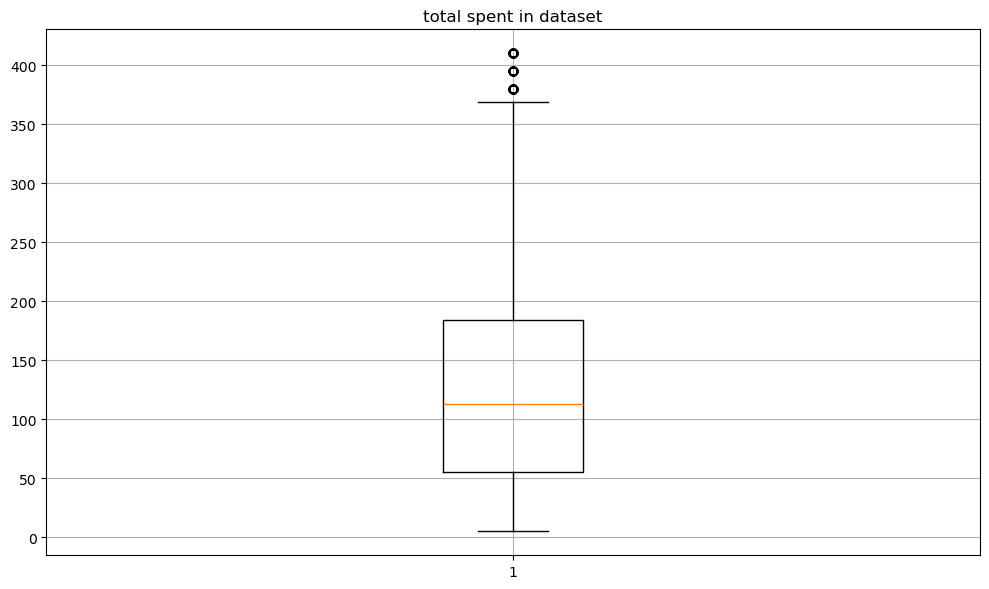

In [57]:
plt.figure(figsize=(10, 6))
plt.boxplot(dfm['Total Spent'])
plt.title('total spent in dataset')
plt.tight_layout()
plt.grid()
plt.show()

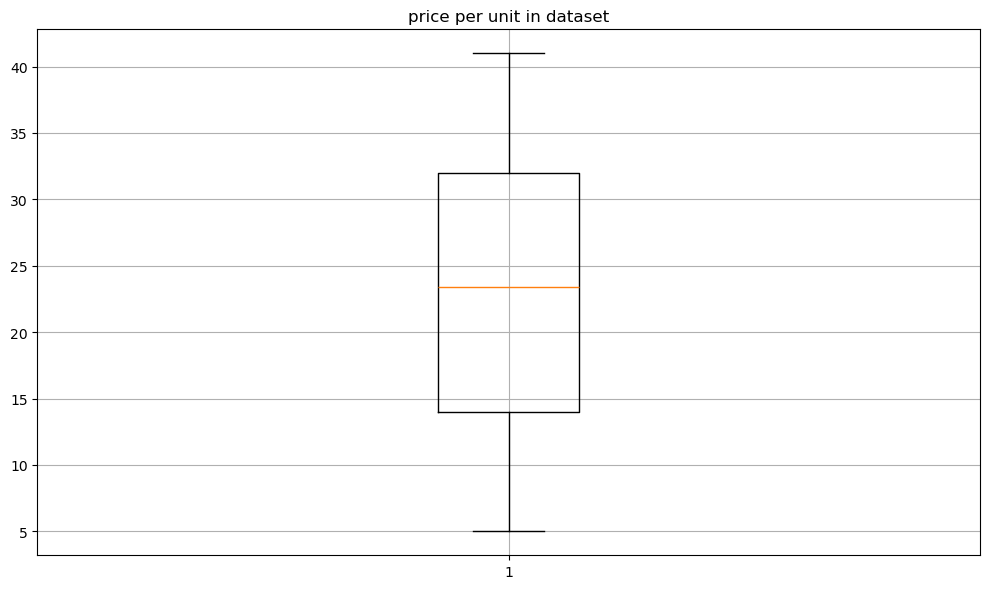

In [58]:
plt.figure(figsize=(10, 6))
plt.boxplot(dfm['Price Per Unit'])
plt.title('price per unit in dataset')
plt.tight_layout()
plt.grid()
plt.show()

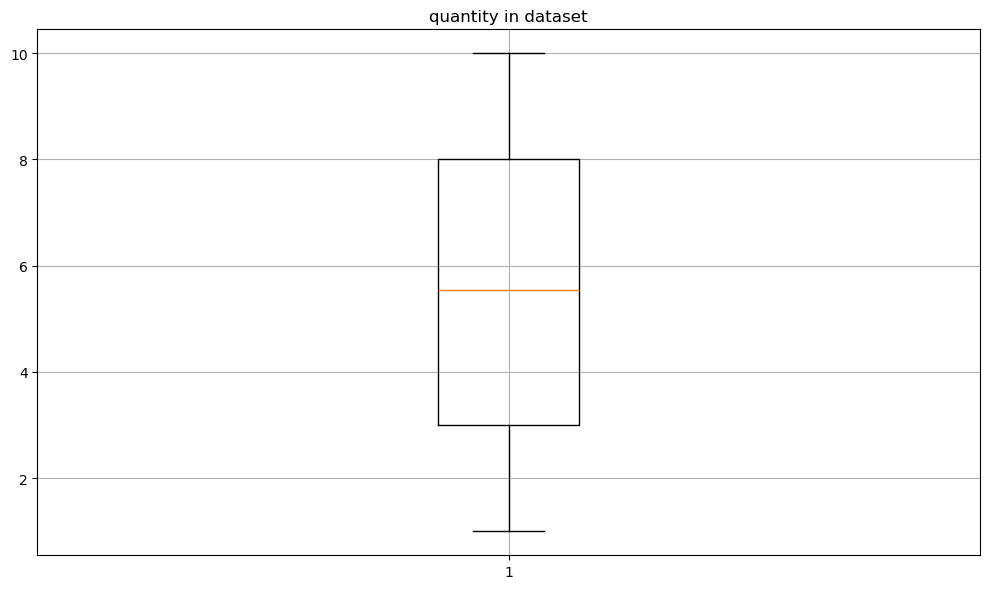

In [59]:
plt.figure(figsize=(10, 6))
plt.boxplot(dfm['Quantity'])
plt.title('quantity in dataset')
plt.tight_layout()
plt.grid()
plt.show()

## Hitung dan analisis matriks korelasi


In [60]:
# cara untuk menghitung korelasi matrix menggunakan pandas
dfm.corr(numeric_only=True)

,Price Per Unit,Quantity,Total Spent
Price Per Unit,1.000000,0.011185,0.597953
Quantity,0.011185,1.000000,0.712069
Total Spent,0.597953,0.712069,1.000000


# Visualisasi Data: Gunakan grafik atau chart yang relevan (bar, histogram, pie, boxplot, heatmap, dll.)


In [61]:

dfm.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [62]:
dfm.sample(3)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
7399,TXN_7061932,CUST_07,Furniture,Item_25_FUR,41.0,2.0,82.0,Digital Wallet,In-store,2023-07-07,True
4668,TXN_4722809,CUST_12,Electric household essentials,Item_19_EHE,32.0,7.0,224.0,Digital Wallet,Online,2024-10-25,Tidak Diketahui
140,TXN_4801202,CUST_16,Furniture,Item_1_FUR,5.0,3.0,15.0,Digital Wallet,Online,2024-05-31,False


In [63]:
dfm.groupby(["Location", "Category"])["Transaction ID"].count().unstack().fillna(0)

Category,Beverages,Butchers,Computers and electric accessories,Electric household essentials,Food,Furniture,Milk Products,Patisserie
Location,,,,,,,,
In-store,780,784,725,772,794,808,791,767
Online,787,784,833,819,794,783,793,761


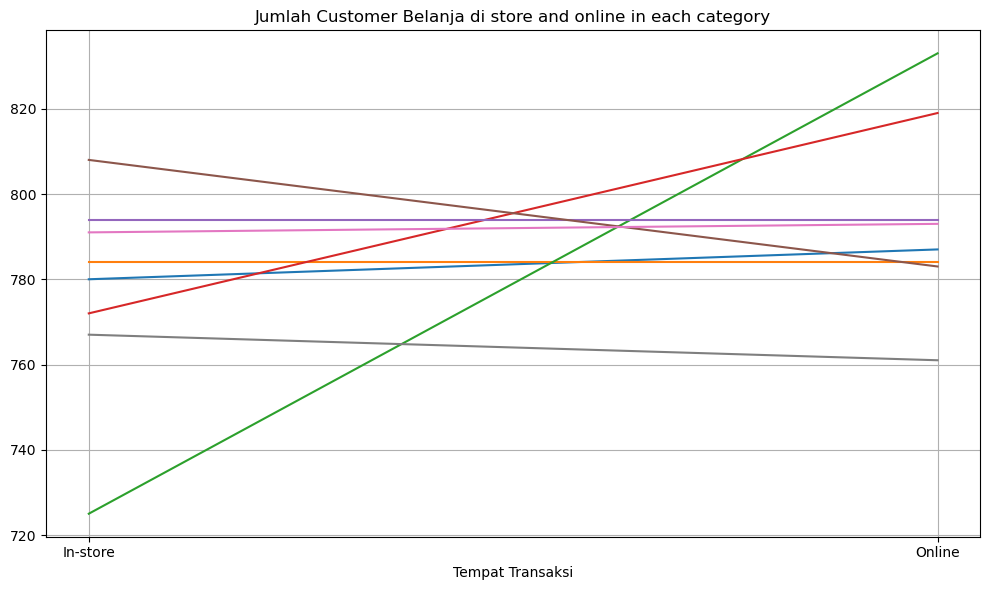

In [64]:
transaksi = dfm.groupby(["Location", "Category"])["Transaction ID"].count().unstack().fillna(0)


plt.figure(figsize=(10,6))
plt.plot(transaksi)
plt.title("Jumlah Customer Belanja di store and online in each category")
plt.xlabel('Tempat Transaksi')
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

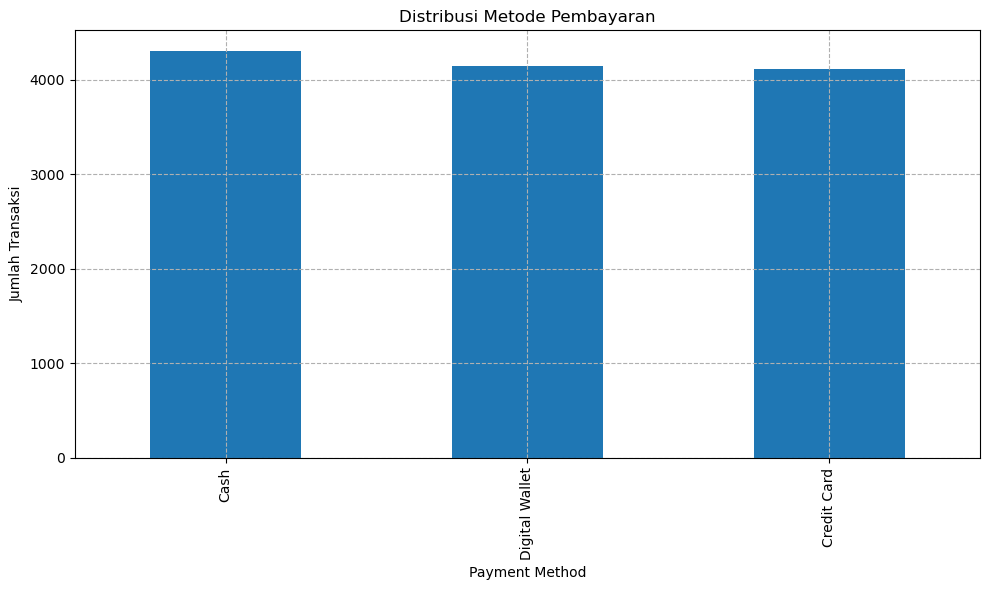

In [65]:
plt.figure(figsize=(10,6))
dfm["Payment Method"].value_counts().plot(kind="bar") # value_counts berfungsi untuk mendeteksi jumlah kemunculan unique value in colom
plt.title("Distribusi Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.tight_layout()
plt.grid(alpha=1, linestyle="--")
plt.show()


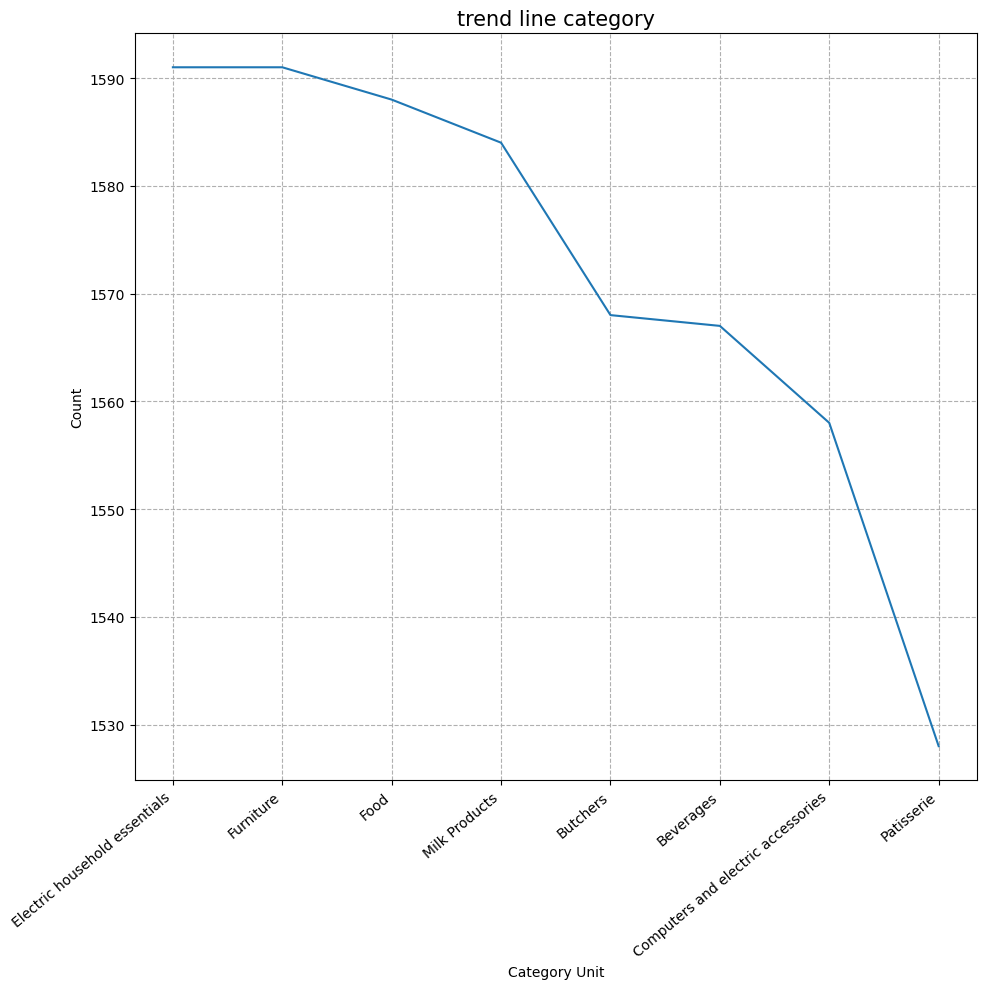

In [70]:
tipe = dfm['Category'].value_counts()
plt.figure(figsize=(10,10))
plt.plot(tipe)

plt.title('trend line category', fontsize=15)
plt.xlabel('Category Unit')
plt.ylabel('Count')
plt.xticks(rotation=40, ha='right')
plt.grid(alpha=1, linestyle= '--')
plt.tight_layout()
plt.show()

In [86]:
dfm.groupby('Category')['Transaction Date'].count().sort_values(ascending=False)

Category
Electric household essentials         1591
Furniture                             1591
Food                                  1588
Milk Products                         1584
Butchers                              1568
Beverages                             1567
Computers and electric accessories    1558
Patisserie                            1528
Name: Transaction Date, dtype: int64

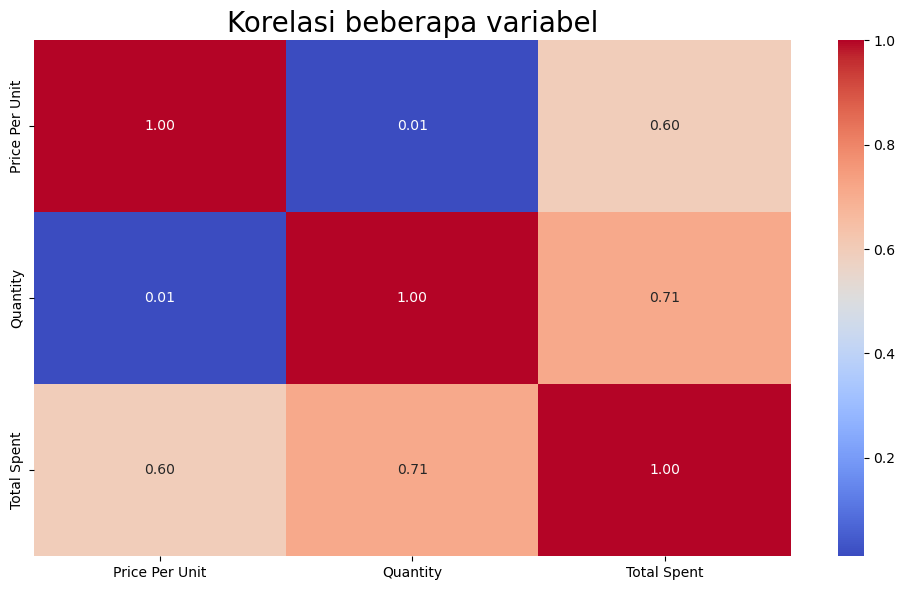

In [96]:
import seaborn as sns

plt.figure(figsize=(10,6))
korelasi = dfm[["Price Per Unit", "Quantity", "Total Spent"]].corr()
sns.heatmap(korelasi, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi beberapa variabel", fontsize=20)
plt.tight_layout()
plt.show()